In [9]:
# from google.colab import drive
# drive.mount('/content/drive')

In [10]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
%pip install numba


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
!nvidia-smi

'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from numba import jit, cuda

In [14]:
import os

path = os.listdir('D://project//Intel//brain_tumor-20230516T141645Z-001//brain_tumor//')
classes = {'no brain tumor [normal]':0, 'benign brain tumor [granuloma]':1, 'benign brain tumor [meningioma]':2, 'benign brain tumor [neurocytoma]':3, 'benign brain tumor [papilloma]':4, 'benign brain tumor [schwannoma]':5, 
           'benign brain tumor [tuberculoma]':6, 'benign to malignant brain tumor [astrocytoma]':7, 'benign to malignant brain tumor [ependymoma]':8, 'benign to malignant brain tumor [ganglioglioma]':9, 'benign to malignant brain tumor [germinoma]':10, 
           'benign to malignant brain tumor [glioblastoma]':11, 'benign to malignant brain tumor [oligodendroglioma]':12, 'malignant brain tumor [carcinoma]':13, 'malignant brain tumor [meduloblastoma]':14}

In [15]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'D://project//Intel//brain_tumor-20230516T141645Z-001//brain_tumor//Training//mri_dataset//'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 1)
        if img is None:
          print("Wrong path", pth)
        else:
          img = cv2.resize(img, (400,400))

          X.append(img)
          Y.append(classes[cls])


          #/content/drive/MyDrive/Brain-tumor-segmentation-master/brain-tumor-detection-master/brain_tumor/Testing/mri_dataset/benign brain tumor [schwannoma]

In [16]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [17]:
np.unique(Y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [18]:
pd.Series(Y).value_counts()

5     273
2     150
3     150
4     150
7     150
11    150
12    150
13    150
8     143
14    114
6     111
0     100
10    100
1      78
9      61
Name: count, dtype: int64

In [19]:
X.shape, X_updated.shape

((2030, 400, 400, 3), (2030, 480000))

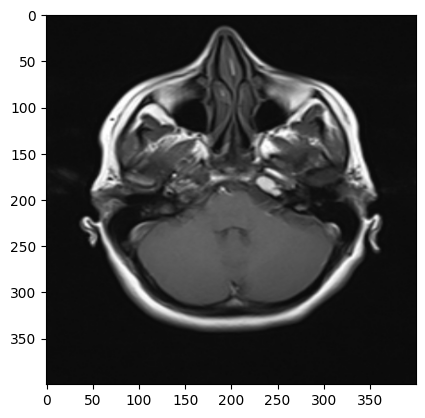

In [20]:
plt.imshow(X[100], cmap='gray')

In [21]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(2030, 480000)

In [22]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10, test_size=.20)

In [23]:
xtrain.shape, xtest.shape

((1624, 480000), (406, 480000))

In [24]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [25]:
from sklearn.decomposition import PCA

In [26]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(1624, 480000) (406, 480000)


In [27]:
# print(pca_train.shape, pca_test.shape)
# print(pca.n_components_)
# print(pca.n_features_)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [29]:
import warnings
warnings.filterwarnings('ignore')

@jit(target_backend="cuda")
def log():
  lg = LogisticRegression(C=0.1)
  lg.fit(xtrain, ytrain)
if __name__=="__main__":
  log()
  


In [ ]:
@jit(target_backend="cuda")
def sccc();
  sv = SVC()
  sv.fit(xtrain, ytrain)
if __name__=="__main__":
  sccc()

In [ ]:
@jit(target_backend="cuda")
def pr():
  print("Training Score:", lg.score(xtrain, ytrain))
  print("Testing Score:", lg.score(xtest, ytest))
if __name__=="__main__":
  pr()

In [ ]:
@jit(target_backend=="cuda")
def pprr():
  print("Training Score:", sv.score(xtrain, ytrain))
  print("Testing Score:", sv.score(xtest, ytest))\
if __name__=="__main__":
  pprr()
  

In [ ]:
pred = sv.predict(xtest)


In [ ]:
misclassified=np.where(ytest!=pred)
misclassified

In [ ]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[36])

In [ ]:
dec = {0:'no brain tumor [normal]', 1:'benign brain tumor [granuloma]', 2:'benign brain tumor [meningioma]', 3:'benign brain tumor [neurocytoma]', 4:'benign brain tumor [papilloma]', 5:'benign brain tumor [schwannoma]', 
       6:'benign brain tumor [tuberculoma]', 7:'benign to malignant brain tumor [astrocytoma]', 8:'benign to malignant brain tumor [ependymoma]', 9:'benign to malignant brain tumor [ganglioglioma]', 10:'benign to malignant brain tumor [germinoma]', 
       11:'benign to malignant brain tumor [glioblastoma]', 12:'benign to malignant brain tumor [oligodendroglioma]', 13:'malignant brain tumor [carcinoma]', 14:'malignant brain tumor [meduloblastoma]'}

In [ ]:
@jit(target_backend="cuda")
def final():
  plt.figure(figsize=(12,8))
  p = os.listdir('D://project//Intel/brain_tumor-20230516T141645Z-001//brain_tumor//Testing//')
  c=1
  for i in os.listdir('D://project//Intel/brain_tumor-20230516T141645Z-001//brain_tumor//Testing//mri_dataset//')[:6]:
      plt.subplot(4,4,c)
      
      img = cv2.imread('D://project//Intel/brain_tumor-20230516T141645Z-001//brain_tumor//Testing//mri_dataset//'+i, 0)
      if img is None:
        print("wrong path", p)
      else:
        img1 = cv2.resize(img, (2000,2000))
        img1 = img1.reshape(1,-1)/255
        p = sv.predict(img1)
        plt.title(dec[p[0]])
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        c+=1
if __name__=="__main__":
  final()